<a href="https://colab.research.google.com/github/stayup24h/Hangul-to-Unicode-Obfuscation-Project/blob/main/CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# initial
import os
import json
import numpy as np
import gc
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

2025-11-06 03:13:13.589909: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-06 03:13:13.590022: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-06 03:13:13.590291: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-06 03:13:13.645871: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-06 03:13:14.694705: W tensorflow/compiler/

In [2]:
#모델 설계
def model(input_shape):

    input_layer = layers.Input(shape=input_shape)

    x = Conv2D(64, (3, 3), padding='same', activation='relu', name='conv2d')(input_layer)
    x = MaxPooling2D(pool_size=(2, 2), name='max_pooling2d')(x)

    x = Conv2D(128, (3, 3), padding='same', activation='relu', name='conv2d_1')(x)
    x = MaxPooling2D(pool_size=(2, 2), name='max_pooling2d_1')(x)
  
    x = Conv2D(256, (3, 3), padding='same', activation='relu', name='conv2d_2')(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu', name='conv2d_3')(x)
    x = MaxPooling2D(pool_size=(2, 2), name='max_pooling2d_2')(x)

    # Conv + BN + ReLU 4
    x = Conv2D(512, (3, 3), padding='same', name='conv2d_4')(x)
    x = tf.keras.layers.BatchNormalization(name='batch_normalization')(x)
    x = tf.keras.layers.ReLU(name='re_lu')(x) # (None, 4, 4, 512)

    # Conv + BN + ReLU 5
    # (3*3*512+1)*512 = 2359296
    x = Conv2D(512, (3, 3), padding='same', name='conv2d_5')(x)
    x = tf.keras.layers.BatchNormalization(name='batch_normalization_1')(x)
    x = tf.keras.layers.ReLU(name='re_lu_1')(x)

    # Pool 6
    x = MaxPooling2D(pool_size=(2, 2), name='max_pooling2d_3')(x)
    x = Flatten(name='flatten')(x) # (None, 2048)
    x = tf.keras.layers.Dropout(0.5, name='dropout')(x)

    
    cho = layers.Dense(19, activation='softmax', name='cho')(x)
    jung = layers.Dense(21, activation='softmax', name='jung')(x)
    jong = layers.Dense(28, activation='softmax', name='jong')(x)
    model = Model(inputs=input_layer, outputs=[cho, jung, jong])
    
    return model

# 모델 생성 및 요약 출력
han_model = model(input_shape=(128, 128, 1))
han_model.summary()

2025-11-06 03:13:16.970656: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:05:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-11-06 03:13:17.046295: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:05:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-11-06 03:13:17.046349: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:05:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-11-06 03:13:17.046358: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2303] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 12.0. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
2025-11-06 03:13:17.048907

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 64)         640       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 64, 64, 64)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 64, 64, 128)          73856     ['max_pooling2d[0][0]']   

a/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:05:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-11-06 03:13:17.329051: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1977] Could not identify NUMA node of platform GPU id 0, defaulting to 0.  Your kernel may not have been built with NUMA support.
2025-11-06 03:13:17.329090: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:05:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-11-06 03:13:17.329144: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5112 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 5060 Ti, pci bus id: 0000:05:00.0, compute capability: 12.0


In [4]:
import tensorflow as tf
import numpy as np
import gc
import random
import matplotlib.pyplot as plt  # 시각화 import
import os  # os import를 상단으로 이동

# 'model' is already a Keras Functional model instance in this notebook.
# Do not call it like a constructor (that raises: "The first argument to `Layer.call` must always be passed").
# Use the existing model object directly.

# --- 2. 파일 목록 정의 (수정됨) ---
base_path = './datasets'

# 훈련용 파일 (0~8번, 9개)
x_files = [
    f'{base_path}/tensors/tensor_handwriting_19.npy',
    f'{base_path}/tensors/tensor_handwriting_20.npy',
    f'{base_path}/tensors/tensor_printed_0.npy',
    f'{base_path}/tensors/tensor_handwriting_0.npy',
    f'{base_path}/tensors/tensor_handwriting_1.npy',
    f'{base_path}/tensors/tensor_printed_1.npy',
    f'{base_path}/tensors/tensor_handwriting_2.npy',
    #f'{base_path}/tensors/tensor_handwriting_3.npy',
    f'{base_path}/tensors/tensor_printed_2.npy',
    #f'{base_path}/tensors/tensor_handwriting_4.npy',
    f'{base_path}/tensors/tensor_handwriting_5.npy',
    f'{base_path}/tensors/tensor_printed_3.npy',
    f'{base_path}/tensors/tensor_handwriting_6.npy',
    f'{base_path}/tensors/tensor_handwriting_7.npy',
    f'{base_path}/tensors/tensor_printed_4.npy',
    f'{base_path}/tensors/tensor_handwriting_8.npy',
    f'{base_path}/tensors/tensor_handwriting_9.npy',
    f'{base_path}/tensors/tensor_printed_5.npy',
    f'{base_path}/tensors/tensor_handwriting_10.npy',
    f'{base_path}/tensors/tensor_handwriting_11.npy',
    f'{base_path}/tensors/tensor_printed_6.npy',
    f'{base_path}/tensors/tensor_handwriting_12.npy',
    f'{base_path}/tensors/tensor_handwriting_13.npy',
    f'{base_path}/tensors/tensor_printed_7.npy',
    f'{base_path}/tensors/tensor_handwriting_14.npy',
    f'{base_path}/tensors/tensor_handwriting_15.npy',
    f'{base_path}/tensors/tensor_handwriting_16.npy',
    f'{base_path}/tensors/tensor_printed_8.npy',
    f'{base_path}/tensors/tensor_handwriting_17.npy',
    f'{base_path}/tensors/tensor_handwriting_18.npy',
]
y_files = [
    f'{base_path}/labels/labels_handwriting_19.npy',
    f'{base_path}/labels/labels_handwriting_20.npy',
    f'{base_path}/labels/labels_printed_0.npy',
    f'{base_path}/labels/labels_handwriting_0.npy',
    f'{base_path}/labels/labels_handwriting_1.npy',
    f'{base_path}/labels/labels_printed_1.npy',
    f'{base_path}/labels/labels_handwriting_2.npy',
    #f'{base_path}/labels/labels_handwriting_3.npy',
    f'{base_path}/labels/labels_printed_2.npy',
    #f'{base_path}/labels/labels_handwriting_4.npy',
    f'{base_path}/labels/labels_handwriting_5.npy',
    f'{base_path}/labels/labels_printed_3.npy',
    f'{base_path}/labels/labels_handwriting_6.npy',
    f'{base_path}/labels/labels_handwriting_7.npy',
    f'{base_path}/labels/labels_printed_4.npy',
    f'{base_path}/labels/labels_handwriting_8.npy',
    f'{base_path}/labels/labels_handwriting_9.npy',
    f'{base_path}/labels/labels_printed_5.npy',
    f'{base_path}/labels/labels_handwriting_10.npy',
    f'{base_path}/labels/labels_handwriting_11.npy',
    f'{base_path}/labels/labels_printed_6.npy',
    f'{base_path}/labels/labels_handwriting_12.npy',
    f'{base_path}/labels/labels_handwriting_13.npy',
    f'{base_path}/labels/labels_printed_7.npy',
    f'{base_path}/labels/labels_handwriting_14.npy',
    f'{base_path}/labels/labels_handwriting_15.npy',
    f'{base_path}/labels/labels_printed_8.npy',
    f'{base_path}/labels/labels_handwriting_16.npy',
    f'{base_path}/labels/labels_handwriting_17.npy',
    f'{base_path}/labels/labels_handwriting_18.npy'
]

x_val_files = [
    f'{base_path}/tensors/tensor_printed_9.npy',
    f'{base_path}/tensors/tensor_handwriting_21.npy'
]
y_val_files = [
    f'{base_path}/labels/labels_printed_9.npy',
    f'{base_path}/labels/labels_handwriting_21.npy'
]


# --- 3. Python 데이터 제너레이터 (데이터 로드 담당) ---
def data_generator(x_paths, y_paths, is_training=True):
    """
    Python Generator: .npy 파일을 하나씩 로드하고,
    데이터를 한 샘플씩 (image, label) 형태로 반환(yield)합니다.
    """
    
    # 훈련 시에만 파일 목록을 섞습니다.
    file_list = list(zip(x_paths, y_paths))
    
    if is_training:
        random.shuffle(file_list)
    
    x_paths_shuffled, y_paths_shuffled = zip(*file_list)

    # 모든 파일을 순회
    for x_file, y_file in zip(x_paths_shuffled, y_paths_shuffled):
        try:
            # (1) RAM에 파일 청크 1개 로드
            x_chunk = np.load(x_file)
            y_chunk = np.load(y_file)
            
            # (2) 청크 내의 데이터를 하나씩 반환(yield)
            for i in range(len(x_chunk)):
                yield x_chunk[i], y_chunk[i]
            
            # (3) 청크 사용이 끝나면 RAM에서 즉시 해제
            del x_chunk, y_chunk
            gc.collect()
            
        except FileNotFoundError:
            print(f"경고: 파일을 찾을 수 없습니다. 건너뜁니다: {x_file}")
            continue
        except Exception as e:
            print(f"경고: 데이터 로드 중 오류 발생: {e}")
            continue

# --- 4. TF 데이터 전처리 함수 (GPU 처리 담당) ---
def process_data(image, label):
    """
    tf.data.Dataset.map()을 통해 GPU에서 병렬로 실행될 함수입니다.
    (모든 연산은 tf.* 함수로만 구성됩니다)
    """
    # (x_train) 원본 데이터를 하나씩 처리합니다.
    image = tf.expand_dims(image, axis=-1)
    # tf.image.resize는 GPU에서 매우 빠릅니다.
    image = tf.image.resize(image, (128, 128))
    image = tf.cast(image, tf.uint8)
    
    # (y_train) 레이블을 하나씩 처리합니다.
    y_cho = label[:19]
    y_jung = label[19:40]
    y_jong = label[40:]
    labels = {'cho': y_cho, 'jung': y_jung, 'jong': y_jong}
    
    # (이미지, 레이블 딕셔너리) 쌍으로 반환
    return image, labels

# --- 5. 데이터셋 파이프라인 구성 ---
BATCH_SIZE = 32

# (중요) 제너레이터의 출력 형태(shape)와 타입(dtype)을 지정해야 합니다.
OUTPUT_SIGNATURE = (
    tf.TensorSpec(shape=(None, None), dtype=tf.uint8), # 원본 x (uint8)
    tf.TensorSpec(shape=(68,), dtype=tf.float32)       # 원본 y (float32)
)


In [5]:
import keras


print("훈련 데이터셋 파이프라인 생성 중...")
# 1. 훈련 데이터셋
train_dataset = tf.data.Dataset.from_generator(
    lambda: data_generator(x_files, y_files, is_training=True),
    output_signature=OUTPUT_SIGNATURE
)

train_dataset = train_dataset.map(process_data, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(1000) # 1000개 샘플 크기의 버퍼로 셔플
train_dataset = train_dataset.batch(BATCH_SIZE)
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

print("검증 데이터셋 파이프라인 생성 중...")
# 2. 검증 데이터셋 (추가됨)
val_dataset = tf.data.Dataset.from_generator(
    # 검증 시에는 셔플하지 않습니다 (is_training=False)
    lambda: data_generator(x_val_files, y_val_files, is_training=False),
    output_signature=OUTPUT_SIGNATURE
)

val_dataset = val_dataset.map(process_data, num_parallel_calls=tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(BATCH_SIZE) # 검증도 배치 단위로 처리
val_dataset = val_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

print("훈련 및 검증 파이프라인 준비 완료.")

# --- 6. 모델 컴파일 및 학습 (수정됨) ---
# (han_model 변수가 이전에 정의되어 있다고 가정)
# han_model = model((128,128,1))
NUM_EPOCHS = 10

# (수정됨) 체크포인트 경로. {epoch} 형식을 사용하여 매 에포크마다 파일이 생성되도록 합니다.
checkpoint_dir = f"training_checkpoints/E{NUM_EPOCHS}"
# 파일 이름에 {epoch:02d}를 추가 (예: model.weights.01.h5)
checkpoint_path = os.path.join(checkpoint_dir, "model.weights.{epoch:02d}.h5") 
os.makedirs(checkpoint_dir, exist_ok=True)

# (수정됨) ModelCheckpoint 콜백.
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_freq='epoch',
    save_best_only=False,    # (수정됨) False로 변경하여 매 에포크마다 저장
    # monitor='val_loss',    # save_best_only=False 이므로 모니터링 불필요
    # mode='min',
    verbose=1
)

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4, clipnorm=1.0)

han_model.compile(
    optimizer=optimizer,
    loss={'cho': 'categorical_crossentropy',
          'jung': 'categorical_crossentropy',
          'jong': 'categorical_crossentropy'},
    metrics={'cho': 'accuracy',
             'jung': 'accuracy',
             'jong': 'accuracy'}
)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True,
                                                  monitor='val_loss')

lr_scheduler_cb = keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                    factor=0.1,
                                                    patience=3)
print("\n모델 훈련 시작...")

history = han_model.fit(
    train_dataset,
    epochs=NUM_EPOCHS,
    validation_data=val_dataset, # <-- (수정) validation_split 대신 val_dataset 사용
    # batch_size=32,            # <-- (제거) Dataset에 이미 배치 크기 적용됨
    callbacks=[cp_callback, early_stopping_cb, lr_scheduler_cb] # <-- 3개 콜백 모두 전달
)
print("모델 학습 완료.")

print(history.history.keys())

훈련 데이터셋 파이프라인 생성 중...
검증 데이터셋 파이프라인 생성 중...
훈련 및 검증 파이프라인 준비 완료.

모델 훈련 시작...
Epoch 1/10


2025-11-06 03:14:03.119989: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907
2025-11-06 03:14:03.306406: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2025-11-06 03:14:03.313710: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:231] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 12.0
2025-11-06 03:14:03.313747: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:234] Used ptxas at /usr/local/cuda-11.8/bin/ptxas
2025-11-06 03:14:03.313820: W tensorflow/compiler/xla/stream_executor/gpu/redzone_allocator.cc:322] UNIMPLEMENTED: /usr/local/cuda-11.8/bin/ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2025-11-06 03:14:04.035608: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot 

  29402/Unknown - 1689s 57ms/step - loss: 0.7537 - cho_loss: 0.2166 - jung_loss: 0.2942 - jong_loss: 0.2429 - cho_accuracy: 0.9373 - jung_accuracy: 0.9141 - jong_accuracy: 0.9332경고: 데이터 로드 중 오류 발생: cannot reshape array of size 910479232 into shape (49999,150,150)
  30721/Unknown - 1764s 57ms/step - loss: 0.7783 - cho_loss: 0.2243 - jung_loss: 0.3008 - jong_loss: 0.2532 - cho_accuracy: 0.9349 - jung_accuracy: 0.9124 - jong_accuracy: 0.9308

2025-11-06 03:43:23.578013: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 5350712116102195293
2025-11-06 03:43:23.578108: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 9890131312273885429
2025-11-06 03:43:23.578121: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 8709449482728871009
2025-11-06 03:43:23.578128: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 5717630856038839447
2025-11-06 03:43:23.578135: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 11015004342687347580
2025-11-06 03:43:23.578165: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3708509329662981498



Epoch 1: saving model to training_checkpoints/E10/model.weights.01.h5
30721/30721 [==============================] - 1821s 59ms/step - loss: 0.7783 - cho_loss: 0.2243 - jung_loss: 0.3008 - jong_loss: 0.2532 - cho_accuracy: 0.9349 - jung_accuracy: 0.9124 - jong_accuracy: 0.9308 - val_loss: 0.2628 - val_cho_loss: 0.0599 - val_jung_loss: 0.1480 - val_jong_loss: 0.0549 - val_cho_accuracy: 0.9808 - val_jung_accuracy: 0.9533 - val_jong_accuracy: 0.9836 - lr: 1.0000e-04


2025-11-06 03:44:19.883275: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 10843486385582901095
2025-11-06 03:44:19.883365: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 11015004342687347580
2025-11-06 03:44:19.883408: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 12202508824427554302


Epoch 2/10
30720/30721 [============================>.] - ETA: 0s - loss: 0.4317 - cho_loss: 0.1240 - jung_loss: 0.1543 - jong_loss: 0.1534 - cho_accuracy: 0.9613 - jung_accuracy: 0.9544 - jong_accuracy: 0.9579
Epoch 2: saving model to training_checkpoints/E10/model.weights.02.h5
30721/30721 [==============================] - 1805s 59ms/step - loss: 0.4318 - cho_loss: 0.1240 - jung_loss: 0.1543 - jong_loss: 0.1534 - cho_accuracy: 0.9613 - jung_accuracy: 0.9544 - jong_accuracy: 0.9579 - val_loss: 4.9383 - val_cho_loss: 1.4991 - val_jung_loss: 1.6565 - val_jong_loss: 1.7827 - val_cho_accuracy: 0.5778 - val_jung_accuracy: 0.5438 - val_jong_accuracy: 0.5519 - lr: 1.0000e-04
Epoch 3/10
30720/30721 [============================>.] - ETA: 0s - loss: 0.4248 - cho_loss: 0.1233 - jung_loss: 0.1488 - jong_loss: 0.1527 - cho_accuracy: 0.9616 - jung_accuracy: 0.9562 - jong_accuracy: 0.9583
Epoch 3: saving model to training_checkpoints/E10/model.weights.03.h5
30721/30721 [===========================


--- 모델 테스트 시작 (에포크별 가중치 로드) ---
테스트 데이터셋 파이프라인 생성 중...

[01/10] 에포크 가중치 로드 완료. 평가 시작...


2025-11-06 09:13:57.311730: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 10843486385582901095
2025-11-06 09:13:57.311826: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 11015004342687347580
2025-11-06 09:13:57.311839: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15745712210798285924
2025-11-06 09:13:57.311846: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 12202508824427554302
2025-11-06 09:13:57.311875: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3708509329662981498


  [Epoch 01] Total Loss: 0.5491, Cho Acc: 0.9575, Jung Acc: 0.9131, Jong Acc: 0.9652

[02/10] 에포크 가중치 로드 완료. 평가 시작...


2025-11-06 09:14:46.963395: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 11015004342687347580
2025-11-06 09:14:46.963474: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 12202508824427554302


  [Epoch 02] Total Loss: 6.2824, Cho Acc: 0.4130, Jung Acc: 0.3934, Jong Acc: 0.3964

[03/10] 에포크 가중치 로드 완료. 평가 시작...
  [Epoch 03] Total Loss: 0.3277, Cho Acc: 0.9812, Jung Acc: 0.9642, Jong Acc: 0.9797

[04/10] 에포크 가중치 로드 완료. 평가 시작...


2025-11-06 09:16:24.549088: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 10843486385582901095
2025-11-06 09:16:24.549180: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 11015004342687347580
2025-11-06 09:16:24.549206: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 12202508824427554302


  [Epoch 04] Total Loss: 0.2537, Cho Acc: 0.9770, Jung Acc: 0.9727, Jong Acc: 0.9855

[05/10] 에포크 가중치 로드 완료. 평가 시작...


2025-11-06 09:17:13.308372: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 10843486385582901095
2025-11-06 09:17:13.308451: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 11015004342687347580
2025-11-06 09:17:13.308463: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15745712210798285924
2025-11-06 09:17:13.308470: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 12202508824427554302
2025-11-06 09:17:13.308497: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3708509329662981498


  [Epoch 05] Total Loss: 0.2238, Cho Acc: 0.9821, Jung Acc: 0.9698, Jong Acc: 0.9856

[06/10] 에포크 가중치 로드 완료. 평가 시작...


2025-11-06 09:18:01.444040: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 10843486385582901095
2025-11-06 09:18:01.444096: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 11015004342687347580
2025-11-06 09:18:01.444109: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15745712210798285924
2025-11-06 09:18:01.444115: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 12202508824427554302
2025-11-06 09:18:01.444142: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3708509329662981498


  [Epoch 06] Total Loss: 0.2457, Cho Acc: 0.9774, Jung Acc: 0.9710, Jong Acc: 0.9810

[07/10] 에포크 가중치 로드 완료. 평가 시작...


2025-11-06 09:18:49.851837: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 10843486385582901095
2025-11-06 09:18:49.851894: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 11015004342687347580
2025-11-06 09:18:49.851907: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15745712210798285924
2025-11-06 09:18:49.851914: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 12202508824427554302
2025-11-06 09:18:49.851942: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3708509329662981498


  [Epoch 07] Total Loss: 7.8052, Cho Acc: 0.5238, Jung Acc: 0.3849, Jong Acc: 0.4208

[08/10] 에포크 가중치 로드 완료. 평가 시작...


2025-11-06 09:19:38.258284: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 11015004342687347580
2025-11-06 09:19:38.258349: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 12202508824427554302


  [Epoch 08] Total Loss: 0.1666, Cho Acc: 0.9908, Jung Acc: 0.9831, Jong Acc: 0.9896

[09/10] 에포크 가중치 로드 완료. 평가 시작...


2025-11-06 09:20:26.642287: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 10843486385582901095
2025-11-06 09:20:26.642344: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 11015004342687347580
2025-11-06 09:20:26.642357: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15745712210798285924
2025-11-06 09:20:26.642365: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 12202508824427554302
2025-11-06 09:20:26.642393: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3708509329662981498


  [Epoch 09] Total Loss: 0.1460, Cho Acc: 0.9897, Jung Acc: 0.9830, Jong Acc: 0.9897

[10/10] 에포크 가중치 로드 완료. 평가 시작...


2025-11-06 09:21:14.788489: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 10843486385582901095
2025-11-06 09:21:14.788561: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 11015004342687347580
2025-11-06 09:21:14.788598: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 12202508824427554302


  [Epoch 10] Total Loss: 0.1666, Cho Acc: 0.9893, Jung Acc: 0.9806, Jong Acc: 0.9891

--- 모든 에포크 테스트 완료 ---
테스트 결과 시각화 중...
테스트 손실 그래프가 training_checkpoints/E10/test_loss_history.png 에 저장되었습니다.
테스트 정확도 그래프가 training_checkpoints/E10/test_accuracy_history.png 에 저장되었습니다.


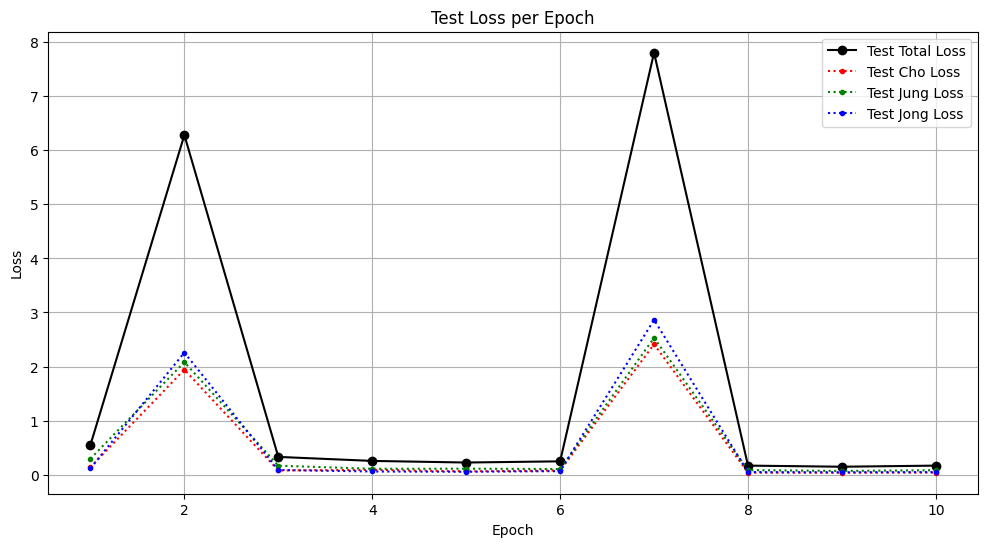

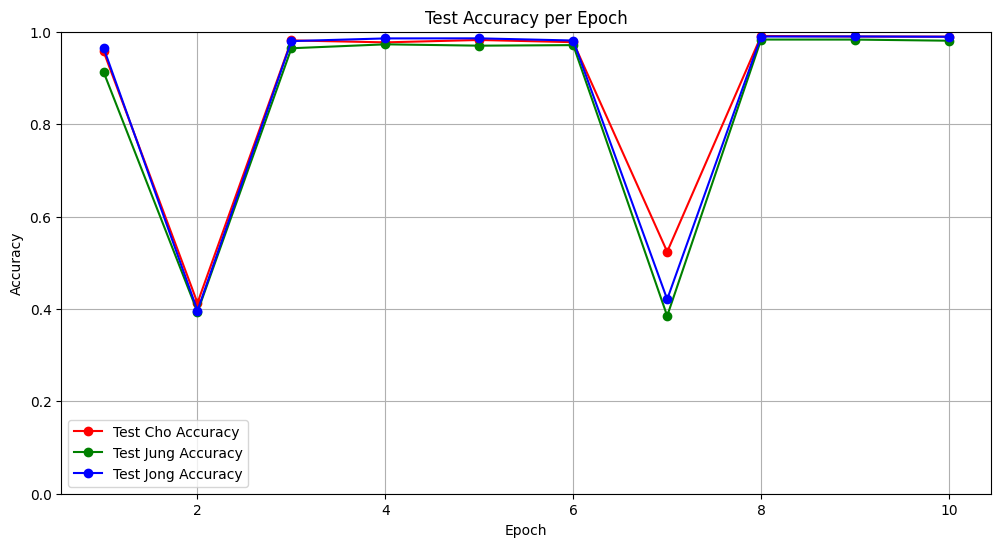

In [6]:
# --- 8. (추가됨) 모델 테스트 및 평가 (에포크별) ---
print("\n--- 모델 테스트 시작 (에포크별 가중치 로드) ---")

x_test_files = [
    f'{base_path}/tensors/tensor_handwriting_22.npy',
    f'{base_path}/tensors/tensor_printed_10.npy'
    ]
y_test_files = [
    f'{base_path}/labels/labels_handwriting_22.npy',
    f'{base_path}/labels/labels_printed_10.npy'
    ]
checkpoint_dir = f"training_checkpoints/E{NUM_EPOCHS}"


print("테스트 데이터셋 파이프라인 생성 중...")
test_dataset = tf.data.Dataset.from_generator(
    # 테스트 시에는 셔플하지 않습니다 (is_training=False)
    lambda: data_generator(x_test_files, y_test_files, is_training=False),
    output_signature=OUTPUT_SIGNATURE
)
test_dataset = test_dataset.map(process_data, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE) # 테스트도 배치 단위로 처리
test_dataset = test_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

# (중요) 테스트 데이터셋(test_dataset)은 이미 5번 섹션에서 준비되었습니다.
# 커널 충돌을 피하기 위해 RAM에 데이터를 직접 로드하지 않습니다.

# 결과를 저장할 리스트
epoch_nums = []
all_total_loss = []
all_cho_loss = []
all_jung_loss = []
all_jong_loss = []
all_cho_acc = []
all_jung_acc = []
all_jong_acc = []

Num_EPOCHS = 8  # 학습된 에포크 수

# 학습된 10개(또는 NUM_EPOCHS 개수만큼)의 체크포인트를 순회
for epoch in range(1, NUM_EPOCHS + 1):
    epoch_str = f"{epoch:02d}"
    # epoch_str = '08'
    weights_path = os.path.join(checkpoint_dir, f"model.weights.{epoch_str}.h5")
    
    if not os.path.exists(weights_path):
        print(f"경고: {weights_path} 파일을 찾을 수 없습니다. 건너뜁니다.")
        continue

    try:
        # 1. 모델에 해당 에포크의 가중치 로드
        han_model.load_weights(weights_path)
        print(f"\n[{epoch_str}/{NUM_EPOCHS}] 에포크 가중치 로드 완료. 평가 시작...")

        # 2. (중요) tf.data.Dataset 파이프라인으로 모델 평가
        # (RAM을 직접 사용하지 않아 커널 충돌이 발생하지 않음)
        results = han_model.evaluate(test_dataset, verbose=0) # verbose=0으로 로그 최소화

        # 3. 결과 저장
        epoch_nums.append(epoch)
        
        # han_model.metrics_names 순서에 따라 인덱싱
        # ['loss', 'cho_loss', 'jung_loss', 'jong_loss', 'cho_accuracy', 'jung_accuracy', 'jong_accuracy']
        all_total_loss.append(results[0])
        all_cho_loss.append(results[1])
        all_jung_loss.append(results[2])
        all_jong_loss.append(results[3])
        all_cho_acc.append(results[4])
        all_jung_acc.append(results[5])
        all_jong_acc.append(results[6])
        
        print(f"  [Epoch {epoch_str}] Total Loss: {results[0]:.4f}, Cho Acc: {results[4]:.4f}, Jung Acc: {results[5]:.4f}, Jong Acc: {results[6]:.4f}")

    except Exception as e:
        print(f"오류: {weights_path} 평가 중 문제 발생: {e}")

print("\n--- 모든 에포크 테스트 완료 ---")

# --- 9. (추가됨) 테스트 결과 시각화 ---
if epoch_nums:
    try:
        print("테스트 결과 시각화 중...")
        
        # 그래프 1: 손실 (Loss)
        plt.figure(figsize=(12, 6))
        plt.plot(epoch_nums, all_total_loss, 'k-', marker='o', label='Test Total Loss')
        plt.plot(epoch_nums, all_cho_loss, 'r:', marker='.', label='Test Cho Loss')
        plt.plot(epoch_nums, all_jung_loss, 'g:', marker='.', label='Test Jung Loss')
        plt.plot(epoch_nums, all_jong_loss, 'b:', marker='.', label='Test Jong Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Test Loss per Epoch')
        plt.legend()
        plt.grid(True)
        
        loss_chart_path = os.path.join(checkpoint_dir, "test_loss_history.png")
        plt.savefig(loss_chart_path)
        print(f"테스트 손실 그래프가 {loss_chart_path} 에 저장되었습니다.")
        # plt.show()

        # 그래프 2: 정확도 (Accuracy)
        plt.figure(figsize=(12, 6))
        plt.plot(epoch_nums, all_cho_acc, 'r-', marker='o', label='Test Cho Accuracy')
        plt.plot(epoch_nums, all_jung_acc, 'g-', marker='o', label='Test Jung Accuracy')
        plt.plot(epoch_nums, all_jong_acc, 'b-', marker='o', label='Test Jong Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.ylim(0, 1) # 정확도는 0과 1 사이
        plt.title('Test Accuracy per Epoch')
        plt.legend()
        plt.grid(True)
        
        acc_chart_path = os.path.join(checkpoint_dir, "test_accuracy_history.png")
        plt.savefig(acc_chart_path)
        print(f"테스트 정확도 그래프가 {acc_chart_path} 에 저장되었습니다.")
        # plt.show()

    except Exception as e:
        print(f"테스트 시각화 중 알 수 없는 오류 발생: {e}")
else:
    print("평가된 결과가 없어 테스트 시각화를 건너뜁니다.")


테스트 정확도 그래프가 training_checkpoints/E10/test_accuracy_history.png 에 저장되었습니다.


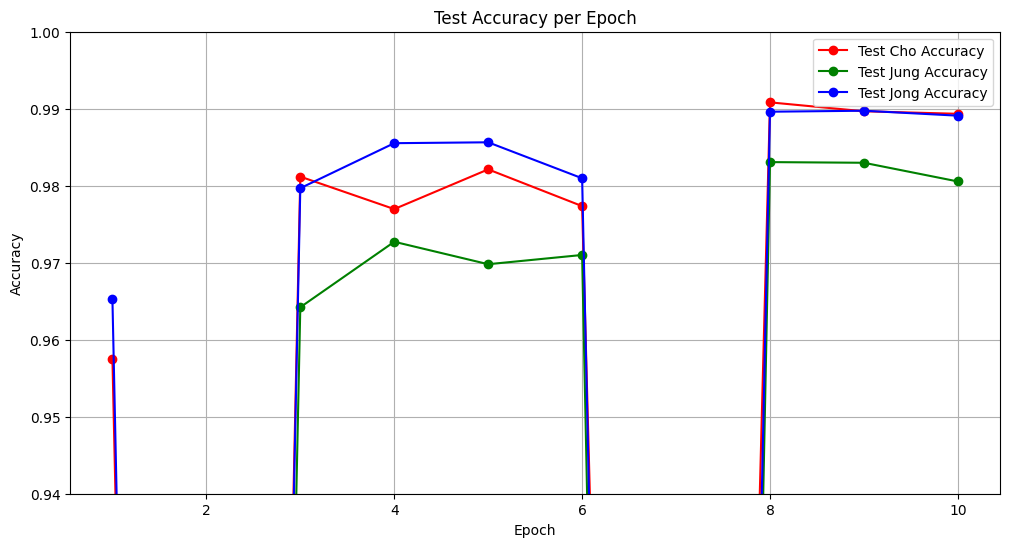

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(epoch_nums, all_cho_acc, 'r-', marker='o', label='Test Cho Accuracy')
plt.plot(epoch_nums, all_jung_acc, 'g-', marker='o', label='Test Jung Accuracy')
plt.plot(epoch_nums, all_jong_acc, 'b-', marker='o', label='Test Jong Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.94, 1) # 정확도는 0과 1 사이
plt.title('Test Accuracy per Epoch')
plt.legend()
plt.grid(True)

acc_chart_path = os.path.join(checkpoint_dir, "test_accuracy_history.png")
plt.savefig(acc_chart_path)
print(f"테스트 정확도 그래프가 {acc_chart_path} 에 저장되었습니다.")

In [ ]:
#모델 저장하기

checkpoint_path = "training_checkpoints/11_03/model.weights.h5"

# Create the directory if it doesn't exist
checkpoint_dir = os.path.dirname(checkpoint_path)
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

han_model.save_weights(checkpoint_path)

In [ ]:
#모델 불러오기
han_model = model((128,128,1))
checkpoint_path = "training_checkpoints/11_03/model.weights.h5"
han_model.load_weights(checkpoint_path)

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'training_checkpoints/11_03/model.weights.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

KeyError: 'val_cho_accuracy'

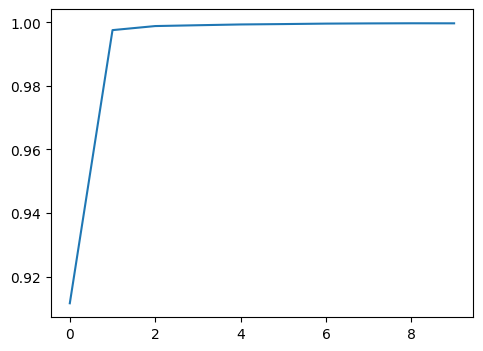

In [ ]:
# --- 7. (수정됨) 학습 결과 시각화 (검증 데이터 포함) ---
try:
    print("학습 결과를 시각화합니다...")

    fig, loss_ax = plt.subplots(figsize=(12, 6))
    acc_ax = loss_ax.twinx()

    # --- Loss (손실) 그래프 (Train vs Val) ---
    loss_ax.plot(history.history['loss'], 'y', linestyle='-', label='train loss')
    loss_ax.plot(history.history['val_loss'], 'y', linestyle='--', label='val loss') # val_loss 추가

    # (선택) 개별 손실
    # loss_ax.plot(history.history['cho_loss'], 'r', linestyle=':', label='cho loss')
    # loss_ax.plot(history.history['val_cho_loss'], 'r', linestyle='-.', label='val cho loss')
    
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc='upper left')

    # --- Accuracy (정확도) 그래프 (Train vs Val) ---
    # (예시: 'cho' 정확도만 비교)
    acc_ax.plot(history.history['cho_accuracy'], 'r', linestyle='-', label='train cho acc')
    acc_ax.plot(history.history['val_cho_accuracy'], 'r', linestyle='--', label='val cho acc') # val_cho_accuracy 추가

    # (예시: 'jung' 정확도만 비교)
    acc_ax.plot(history.history['jung_accuracy'], 'g', linestyle='-', label='train jung acc')
    acc_ax.plot(history.history['val_jung_accuracy'], 'g', linestyle='--', label='val jung acc') # val_jung_accuracy 추가
    
    acc_ax.set_ylabel('accuracy')
    acc_ax.legend(loc='upper right')

    plt.title('Model Loss and Accuracy (Train vs Validation)')
    
    # 그래프를 파일로 저장
    chart_path = os.path.join(checkpoint_dir, "training_history.png")
    plt.savefig(chart_path)
    print(f"학습 결과 그래프가 {chart_path} 로 저장되었습니다.")
    # plt.show()

except KeyError as e:
    print(f"시각화 오류: history 객체에 '{e.key}' 키가 없습니다. (예: 'val_loss')")
except Exception as e:
    print(f"시각화 중 알 수 없는 오류 발생: {e}")

In [15]:
# 직접 그린 이미지 테스트하기
from PIL import Image
import tensorflow as tf # Import tensorflow
import numpy as np # Import numpy
import os # Import os

# Re-instantiate the model if it's not already in memory, and load weights
if 'han_model' not in locals():
    # Assuming 'model' function is defined elsewhere in the notebook
    if 'model' not in locals():
        print("Error: 'model' function is not defined. Please ensure the model architecture is defined.")
        exit() # Exit if model function is not defined
    han_model = model((128,128,1))
    checkpoint_path = "Hangul-to-Unicode-Obfuscation-Project/training_checkpoints/E10/model.weights.08.h5"
    try:
        han_model.load_weights(checkpoint_path)
        print("Model weights loaded successfully.")
    except tf.errors.NotFoundError:
        print(f"Error: Model weights file not found at {checkpoint_path}. Please ensure you have trained and saved the model.")
        exit() # Exit if weights are not found


# Specify the path to your image file
# Change this path to the location of your image in the Colab environment
image_path = '/home/stayup24h/Hangul-to-Unicode-Obfuscation-Project/Frame 19.png' # Example local path

# Load the image
try:
    img = Image.open(image_path).convert('L') # Convert to grayscale
    img_array = np.array(img)

    # Preprocess the image to match the model's input shape and type
    # Resize, expand dimensions, and convert to boolean using TensorFlow operations
    img_array = np.expand_dims(img_array, axis=-1)
    img_array = tf.image.resize(img_array, (128, 128))
    # Use TensorFlow operations instead of NumPy's .astype()
    img_array = tf.cast(img_array, tf.float32) / 255.0
    img_array = np.expand_dims(img_array, axis=0) # Add batch dimension

    # Make predictions
    predictions = han_model.predict(img_array)

    # Get the predicted class for each output
    predicted_cho_index = np.argmax(predictions[0], axis=1)[0]
    predicted_jung_index = np.argmax(predictions[1], axis=1)[0]
    predicted_jong_index = np.argmax(predictions[2], axis=1)[0]

    # You'll need to map these indices back to the actual characters.
    # Assuming you have lists of characters for cho, jung, and jong in the correct order:
    # Example (replace with your actual character lists):
    cho_chars = ['ㄱ', 'ㄲ', 'ㄴ', 'ㄷ', 'ㄸ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅃ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅉ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']
    jung_chars = ['ㅏ', 'ㅐ', 'ㅑ', 'ㅒ', 'ㅓ', 'ㅔ', 'ㅕ', 'ㅖ', 'ㅗ', 'ㅘ', 'ㅙ', 'ㅚ', 'ㅛ', 'ㅜ', 'ㅝ', 'ㅞ', 'ㅟ', 'ㅠ', 'ㅡ', 'ㅢ', 'ㅣ']
    jong_chars = [' ', 'ㄱ', 'ㄲ', 'ㄳ', 'ㄴ', 'ㄵ', 'ㄶ', 'ㄷ', 'ㄹ', 'ㄺ', 'ㄻ', 'ㄼ', 'ㄽ', 'ㄾ', 'ㄿ', 'ㅀ', 'ㅁ', 'ㅂ', 'ㅄ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']


    predicted_cho = cho_chars[predicted_cho_index]
    predicted_jung = jung_chars[predicted_jung_index]
    predicted_jong = jong_chars[predicted_jong_index]


    print(f"Predicted Cho: {predicted_cho}, intex: {predictions[0]}")
    print(f"Predicted Jung: {predicted_jung}, intex: {predictions[1]}")
    print(f"Predicted Jong: {predicted_jong}, intex: {predictions[2]}")

except FileNotFoundError:
    print(f"Error: Image file not found at {image_path}. Please provide a valid image path.")
except Exception as e:
    print(f"An error occurred during image processing or prediction: {e}")

1/1 [==============================] - 0s 17ms/step
Predicted Cho: ㅃ, intex: [[0.01402339 0.01619919 0.00917704 0.02171643 0.02107118 0.01978189
  0.02264175 0.01241773 0.58446974 0.00772028 0.06337307 0.01954256
  0.018306   0.0656314  0.01971193 0.01094038 0.01065083 0.0261415
  0.03648375]]
Predicted Jung: ㅙ, intex: [[0.04066662 0.08660901 0.05134283 0.10054705 0.03366885 0.08170783
  0.02063397 0.04501124 0.02447324 0.03046881 0.1057822  0.0388082
  0.04156221 0.0315008  0.03873608 0.05740368 0.03042799 0.02479507
  0.02566887 0.0407148  0.04947067]]
Predicted Jong: ㅄ, intex: [[0.01126781 0.01536614 0.01005121 0.04214086 0.00815368 0.02942268
  0.04802859 0.00887011 0.00724421 0.01675661 0.08515099 0.11611465
  0.04959699 0.04028867 0.03783174 0.07345416 0.02478361 0.02309531
  0.21875024 0.00567405 0.02355774 0.02482748 0.0171404  0.01471449
  0.00924838 0.0059916  0.00691715 0.02556041]]
